In [6]:
import math
import numpy
from geopy import distance
import pandas
import pygad
import random

path_to_user_data = "ToyUserData2.csv"

# Chromosome

### Invariant:
Each integer in the range [0, `len(chromosome) / 5`] appears exactly five times (in any order).

## Reorder Chromosome

$i < j \implies$ The number $i$ appears before the number $j$ in the chromosome.

In [7]:
def reorder_chromosome(chromosome):
    dictionary = {}

    for i in range(len(chromosome)):

        if (chromosome[i] not in dictionary): # O(1) average time
            dictionary[chromosome[i]] = len(dictionary)

        chromosome[i] = dictionary[chromosome[i]]

## Generate Chromosome
Given a chromosome length, generate a random legal chromosome.

In [8]:
def generate_chromosome(length):
    
    # Generate the array [0, 1, 2, ..., length - 1].
    chromosome = []
    chromosome.extend(range(length))

    # Shuffle the array.
    numpy.random.shuffle(chromosome)

    # Divide (integer division) each number by five.
    chromosome = [math.floor(n / 5) for n in chromosome]
    reorder_chromosome(chromosome)
    return chromosome

## Validate Chromosome

Verify that the invariant holds in $O(n)$ time and $O(n)$ space, where $n$ is the number of users.

In [9]:
def chromosome_is_valid(chromosome):

    number_of_groups = math.floor(len(chromosome) / 5)

    # Use a dictionary to maintain a count of how many times each integer has been seen.
    occurrences = {}
    for i in range(number_of_groups):
        occurrences[i] = 0

    # When iterating through the chromosome, remember what is the highest number seen.
    highest_number_seen = -1

    # Iterate through the chromosome.
    for i in range(len(chromosome)):

        current_number = chromosome[i]

        # (The chromosome cannot contain the number 8 if there are only 5 groups.)
        if (current_number > (number_of_groups - 1)):
            return False

        # (The chromosome cannot contain negative numbers.)
        if (current_number < 0):
            return False
        
        occurrences[current_number] += 1

        if (current_number - highest_number_seen > 1):
            return False

        highest_number_seen = max(current_number, highest_number_seen)     

    # Check the dictionary for any values which !== 5.
    for i in range(number_of_groups):
        if (occurrences[i] != 5):
            return False

    return True

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Repair Chromosome

Repair chromosomes by randomly replacing (numbers there are too many of) with (numbers there are too few of.)



In [10]:
def repair_chromosome(chromosome):

    # print("repair_chromosome() was called.")

    number_of_groups = math.floor(len(chromosome) / 5)

    # Use a dictionary to maintain a count of how many times each integer has been seen.
    occurrences = {}
    for i in range(number_of_groups):
        occurrences[i] = 0

    # Iterate through the chromosome.
    for i in range(len(chromosome)):

        # (If a number in the chromosome is out of bounds, replace it with 0.)
        if (chromosome[i] > number_of_groups - 1 or chromosome[i] < 0):
            chromosome[i] = 0
        
        occurrences[chromosome[i]] += 1

    # Get an array of numbers there are too few of.
    # For example, if the chromosome has three 7s, the array will be [..., 7, 7, ...].

    array_of_missing_numbers = []

    for group_number in range(number_of_groups):
        if (occurrences[group_number] < 5):
            for ignore in range(5 - occurrences[group_number]):
                array_of_missing_numbers.append(group_number)

    numpy.random.shuffle(array_of_missing_numbers)

    # Select a place in the chromosome to start reparing.
    repair_chromosome_index = numpy.random.randint(len(chromosome));

    for ignore in range(len(chromosome)):
        current_number = chromosome[repair_chromosome_index]

        if (occurrences[current_number] > 5):
            chromosome[repair_chromosome_index] = array_of_missing_numbers.pop()
            
            occurrences[current_number] -= 1
            # (There is no need to do occurrences[number_that_replaces_current_number] += 1.)

        # Look at the next number in the chromosome.
        # If we have reached the end of the chromosome, jump to the beginning of the chromosome.
        repair_chromosome_index = (repair_chromosome_index + 1) % len(chromosome)

## Calculate Chromosome Fitness

### Copypasta from `compatibility.ipynb`

In [11]:
# Read the data.
df_location = pandas.read_csv("Location Information.csv", index_col = "station_name")

# Return the distance between the MRT stations in kilometers.
def distance_between_locations(station_1: str, station_2: str):

    station_1 = station_1.upper()
    station_2 = station_2.upper()

    station_1_coordinates = (df_location.loc[station_1].latitude, df_location.loc[station_1].longitude)
    station_2_coordinates = (df_location.loc[station_2].latitude, df_location.loc[station_2].longitude)
    
    return math.ceil(distance.distance(station_1_coordinates, station_2_coordinates).km)

def learning_style_compatibility(array_1, array_2):

    # Divide the input vectors by their magnitudes to obtain unit vectors.
    array_1_normalised = array_1 / numpy.linalg.norm(array_1)
    array_2_normalised = array_2 / numpy.linalg.norm(array_2)

    return numpy.dot(array_1_normalised, array_2_normalised)

def module_compatibility(set_1: set, set_2: set):
    return len(set_1.intersection(set_2))

# Read the data.
df_users = pandas.read_csv(path_to_user_data, index_col = "user_id")

class User:
    def __init__(self, user_id, dim_1, dim_2, dim_3, dim_4, location, module_1, module_2, module_3, module_4, module_5, module_6):
        self.user_id = user_id
        self.learning_style = [dim_1, dim_2, dim_3, dim_4]
        self.location = location
        self.modules = {module_1, module_2, module_3, module_4, module_5, module_6}

    def toString(self):
        return "user_id: " + str(self.user_id) + " learning_style: " + str(self.learning_style) + " location: " + str(self.location) + " modules: " + str(self.modules)


def get_user_from_id(user_id):

    row = df_users.loc[user_id]

    return User(user_id, row.studying_style_dim_1, row.studying_style_dim_2, row.studying_style_dim_3, row.studying_style_dim_4, row.user_location, row.module_1, row.module_2, row.module_3, row.module_4, row.module_5, row.module_6)
   

def calculate_pair_compatibility(user_1, user_2):

    a = 50 * module_compatibility(user_1.modules, user_2.modules)
    b = 100 * learning_style_compatibility(user_1.learning_style, user_2.learning_style)
    c = - 5 * distance_between_locations(user_1.location, user_2.location)
    
    return a + b + c

def calculate_group_compatibility(user_array):

    compatibility_score = 0

    number_of_users = len(user_array)

    for i in range(0, number_of_users):
        for j in range(i, number_of_users):
            compatibility_score += calculate_pair_compatibility(user_array[i], user_array[j])
    
    return compatibility_score / math.comb(number_of_users, 2)

### Fitness Function

In [12]:
def calculate_chromosome_fitness(chromosome, solution_index):

    # solution_index is not used. PyGAD requires such a parameter.
    
    if (not chromosome_is_valid(chromosome)):
        repair_chromosome(chromosome)

    # Parse the chromosome and represent the grouping using a dictionary.
    # The dictionary's keys are the team IDs. Each value is an array of user objects.
    number_of_users = len(chromosome)
    number_of_groups = math.floor(number_of_users / 5)

    dictionary = {}

    # Initialise the dictionary.
    for i in range(number_of_groups):
        dictionary[i] = []

    # Add users to their corresponding groups.
    for i in range(number_of_users):
        dictionary[chromosome[i]].append(get_user_from_id(i))
        
    total_group_compatibility = 0;
    for i in range(number_of_groups):
        total_group_compatibility += calculate_group_compatibility(dictionary[i])

    return total_group_compatibility / number_of_groups

# `pygad`

## Settings

In [13]:
parent_selection_type = "sss"
keep_parents = 2

crossover_type = "scattered"

mutation_type = "swap"
mutation_percent_genes = 10

def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])
    
    # Reorder every chromosome in the generation.
    for i in range(sol_per_pop):
        reorder_chromosome(ga_instance.population[i])

## Custom Mutation Function
For each chromosome, swap the location of two different genes.

In [14]:
""" def mutation_function(offspring, ga_instance):
    
    number_of_chromosomes = offspring.shape[0]
    chromosome_length = len(offspring[0])

    print(offspring.shape)
    for chromosome_index in range(number_of_chromosomes):
        
        while (True):
            # Select two different gene locations.
            [gene_one_index, gene_two_index] = random.sample(range(chromosome_length), 2)

            gene_one_value = offspring[chromosome_index, gene_one_index]
            gene_two_value = offspring[chromosome_index, gene_two_index]
 
            if (gene_one_value == gene_two_value):
                # If the genes at these two locations are the same, then swapping them will have no effect.
                # Try looking at another pair of genes.
                continue
            else:
                # Swap the values.
                offspring[chromosome_index, gene_one_index] = gene_two_value
                offspring[chromosome_index, gene_two_index] = gene_one_value
                break # Exit the while loop.
    print(offspring.shape) """

' def mutation_function(offspring, ga_instance):\n    \n    number_of_chromosomes = offspring.shape[0]\n    chromosome_length = len(offspring[0])\n\n    print(offspring.shape)\n    for chromosome_index in range(number_of_chromosomes):\n        \n        while (True):\n            # Select two different gene locations.\n            [gene_one_index, gene_two_index] = random.sample(range(chromosome_length), 2)\n\n            gene_one_value = offspring[chromosome_index, gene_one_index]\n            gene_two_value = offspring[chromosome_index, gene_two_index]\n \n            if (gene_one_value == gene_two_value):\n                # If the genes at these two locations are the same, then swapping them will have no effect.\n                # Try looking at another pair of genes.\n                continue\n            else:\n                # Swap the values.\n                offspring[chromosome_index, gene_one_index] = gene_two_value\n                offspring[chromosome_index, gene_two_index

In [15]:
def custom_mutation_function(offspring, ga_instance):
    
    # Swap mutation.
    for idx in range(offspring.shape[0]):
        mutation_gene1 = numpy.random.randint(low=0, high=offspring.shape[1]/2, size=1)[0]
        mutation_gene2 = mutation_gene1 + int(offspring.shape[1]/2)

        temp = offspring[idx, mutation_gene1]
        offspring[idx, mutation_gene1] = offspring[idx, mutation_gene2]
        offspring[idx, mutation_gene2] = temp
        reorder_chromosome(offspring[idx])
    return offspring

## PyGad Instance

In [16]:
initial_population = []
sol_per_pop = 50

number_of_users = len(df_users)

for i in range(sol_per_pop):
    initial_population.append(generate_chromosome(number_of_users))

ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=2,
                       fitness_func=calculate_chromosome_fitness,
                       sol_per_pop=50,
                       num_genes=number_of_users,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=None,
                       mutation_type=custom_mutation_function,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=int,
                       callback_generation=callback_gen)

ga_instance.run()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation :  1


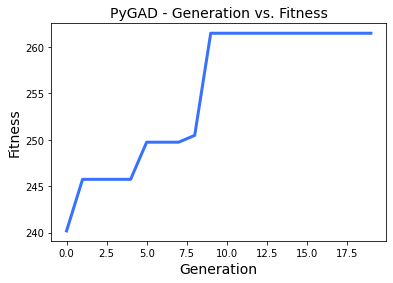

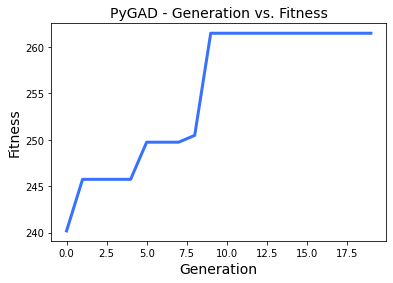

In [ ]:
ga_instance.plot_fitness()

In [ ]:
solution = ga_instance.best_solution()[0]

In [ ]:
for i in range(len(solution)):
    if (solution[i] == 2):
        print(get_user_from_id(i).toString())

user_id: 4 learning_style: [-3, -3, 7, -3] location: LITTLE INDIA modules: {1, 7, 11, 19, 27}
user_id: 7 learning_style: [-1, -1, 7, 1] location: ADMIRALTY modules: {3, 6, 7, 11, 18, 27}
user_id: 8 learning_style: [-7, -7, -1, -1] location: TAI SENG modules: {1, 6, 8, 12, 19, 24}
user_id: 11 learning_style: [-11, 5, 11, 5] location: GEYLANG BAHRU modules: {3, 6, 8, 12, 17, 22}
user_id: 19 learning_style: [5, -11, 3, 7] location: BEAUTY WORLD modules: {3, 4, 6, 11, 20, 25}
